<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Feedforward%20Neural%20Networks/ANN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install -q keras

In [42]:
# MLP for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the datasets
import sklearn.datasets
gila_river = pd.read_csv("https://raw.githubusercontent.com/asheta66/Machine-Learning-2022/main/Multiple%20Linear%20Regression/GilaRiverFlow.csv")
X = gila_river.iloc[:,:-1].values
y = gila_river.iloc[:,3].values
gila_river.head()

,y(k-1),y(k-2),y(k-3),y(k)
0,0,0,0,42
1,42,0,0,41
2,41,42,0,39
3,39,41,42,37
4,37,39,41,36


In [43]:
X

array([[  0,   0,   0],
       [ 42,   0,   0],
       [ 41,  42,   0],
       ...,
       [180, 203, 223],
       [159, 180, 203],
       [142, 159, 180]])

In [44]:
y

array([  42,   41,   39,   37,   36,   38,   39,   39,   40,   39,   40,
         41,   41,   39,   38,   40,   41,   39,   38,   41,   45,   43,
         43,   42,   45,   53,   46,   44,   52,  144,  204,  181,  177,
        170,  165,  163,  153,  148,  139,  143,  150,  154,  158,  160,
        146,  138,  139,  140,  139,  137,  131,  129,  123,  115,  117,
        119,  112,  109,  107,  110,  102,  109,  134,  126,  123,  137,
        157,  178,  192,  199,  200,  188,  177,  163,  153,  144,  134,
        134,  133,  130,  132,  133,  132,  133,  133,  132,  133,  133,
        126,  118,  110,  111,  114,  117,  117,  116,  118,  121,  112,
        102,   95,   91,   91,   92,   94,   96,   98,   97,   91,   93,
         91,   89,   85,   86,   87,   82,   86,   94,   92,   89,   85,
         80,   80,   73,   71,   76,   87,   92,   84,   74,   68,   71,
         72,   68,   72,   79,   85,   88,   89,   93,   97,   97,   92,
         86,   85,   84,   89,   85,   77,   67,   

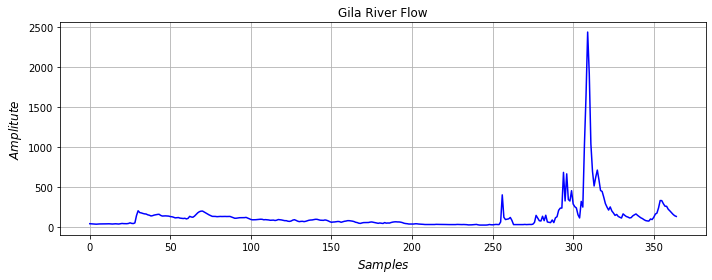

In [45]:
# Drawing river flow

fig, axs = plt.subplots(figsize=(10, 4), tight_layout=True)
plt.plot(y, '-b')
plt.xlabel(r'$ Samples $', fontsize=12)
plt.ylabel(r'$ Amplitute $', fontsize=12)
plt.title(r'Gila River Flow', fontsize=12)
plt.grid(True)
plt.show()

In [46]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [50]:
X_train.shape, y_train.shape

((292, 3), (292,))

In [52]:
# import TensorFlow
import tensorflow as tf
tf.__version__

'2.8.2'

**Improving our model**
1. Create a model - we might wanst to add more layers or increase the number of hidden units within a layer

2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD

3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [111]:
# Set the random seed
tf.random.set_seed(42)

# Create a model (with 3 layers)
# This model will need some enhancements
model = tf.keras.Sequential([
   tf.keras.layers.Dense(100), # add 100 dense neurons
   tf.keras.layers.Dense(10), # add another layers with 10 neurons
   tf.keras.layers.Dense(1)
])


# Compile model
#model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#                optimizer=tf.keras.optimizers.Adam(),
#                metrics=["accuracy"])

model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test),
)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

Fit model on training data
Epoch 1/50
5/5 [==============================] - 1s 72ms/step - loss: 51.3875 - mae: 51.3875 - val_loss: 31.3234 - val_mae: 31.3234
Epoch 2/50
5/5 [==============================] - 0s 17ms/step - loss: 40.3961 - mae: 40.3961 - val_loss: 41.7470 - val_mae: 41.7470
Epoch 3/50
5/5 [==============================] - 0s 18ms/step - loss: 34.6679 - mae: 34.6679 - val_loss: 31.1179 - val_mae: 31.1179
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 33.0412 - mae: 33.0412 - val_loss: 36.6738 - val_mae: 36.6738
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 32.5283 - mae: 32.5283 - val_loss: 30.0439 - val_mae: 30.0439
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 30.7707 - mae: 30.7707 - val_loss: 32.7256 - val_mae: 32.7256
Epoch 7/50
5/5 [==============================] - 0s 19ms/step - loss: 30.1337 - mae: 30.1337 - val_loss: 31.0239 - val_mae: 31.0239
Epoch 8/50
5/5 [==========================

In [112]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


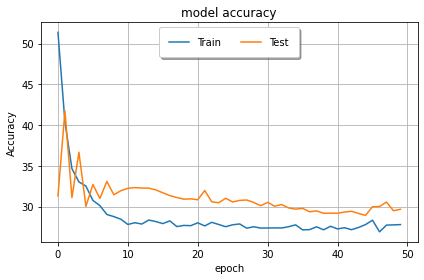

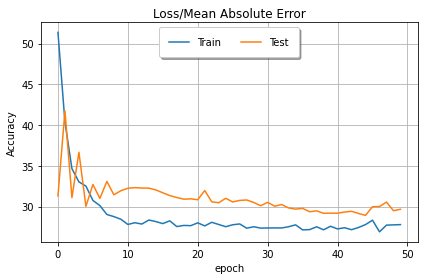

In [117]:
# plot loss during training
fig, axs = plt.subplots(figsize=(6, 4), tight_layout=True)
plt.title('Loss/Mean Absolute Error')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('model accuracy')
plt.ylabel(r'Accuracy')
plt.xlabel(r'epoch')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.grid(True)
plt.show()

# plot loss during training
fig, axs = plt.subplots(figsize=(6, 4), tight_layout=True)
plt.title('Loss/Mean Absolute Error')
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Test')
plt.ylabel(r'Accuracy')
plt.xlabel(r'epoch')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.grid(True)
plt.show()

In [68]:
# Calculating Performance Criteria
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

mse1 = mean_squared_error(y_train, y_pred_train)
mse2 = mean_squared_error(y_test, y_pred_test)

mae1 = mean_absolute_error(y_train, y_pred_train)
mae2 = mean_absolute_error(y_test, y_pred_test)

vs1 = explained_variance_score(y_train, y_pred_train)
vs2 = explained_variance_score(y_test, y_pred_test)

print('mean_squared_error_train (MSE):', format(mse1,".5f"), '    ', 'mean_squared_error_test (MSE):', format(mse2,".5f"),)
print('mean_absolute_error_train (MAE):', format(mae1,".5f"), '    ', 'mean_absolute_error_test (MAE):', format(mae2,".5f"),)
print('Variance_score_train (VarScore):', format(vs1,".5f"), '    ', 'Variance_score_test (VarScore):', format(vs2,".5f"),)


mean_squared_error_train (MSE): 24764.66227      mean_squared_error_test (MSE): 9339.22867
mean_absolute_error_train (MAE): 71.80682      mean_absolute_error_test (MAE): 59.10608
Variance_score_train (VarScore): 0.61870      Variance_score_test (VarScore): 0.72443


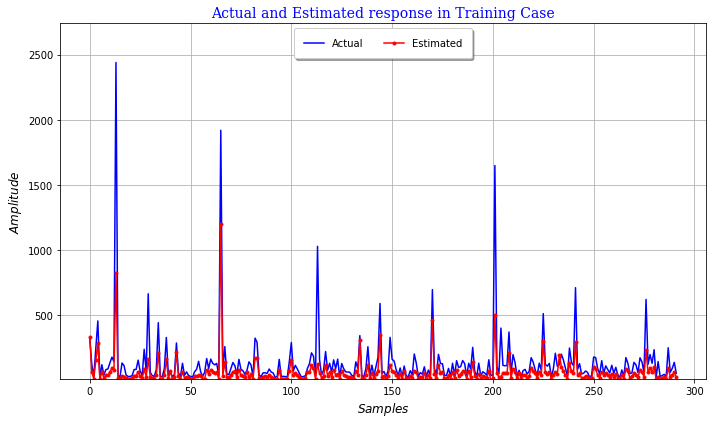

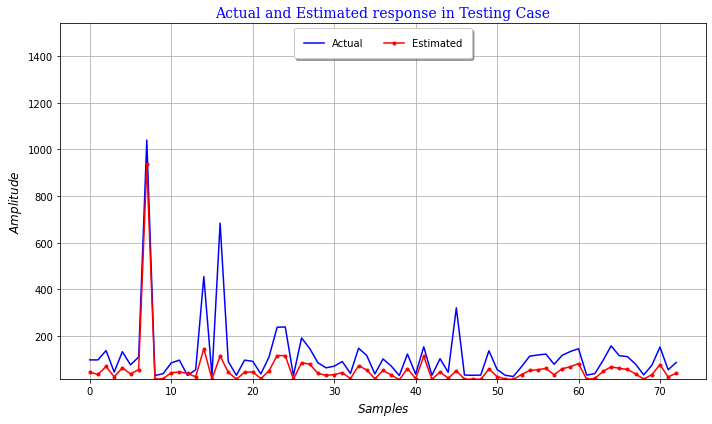

In [67]:
# Drawing the actual and estimated responses

fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)

plt.plot(y_train, '-b', label='Actual')
plt.plot(y_pred_train, '.-r', label='Estimated')

plt.xlabel(r'$ Samples $', fontsize=12)
plt.ylabel(r'$ Amplitude $', fontsize=12)

plt.title(r'Actual and Estimated response in Training Case', fontname= 'serif',fontsize=14, color='b')
plt.ylim(np.min(y_train)-10, np.max(y_train)+300)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.grid(True)
plt.show()

fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)
plt.plot(y_test, '-b', label='Actual')
plt.plot(y_pred_test, '.-r', label='Estimated')
plt.xlabel(r'$ Samples $', fontsize=12)
plt.ylabel(r'$ Amplitude $', fontsize=12)
plt.title(r'Actual and Estimated response in Testing Case', fontname= 'serif',fontsize=14, color='b')
plt.ylim(np.min(y_test)-10, np.max(y_test)+500)
plt.grid(True)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\Actual_Estimated.png')
plt.show()